## Import Packages

In [1]:
# import ROOT 
import pylhe
import math
import matplotlib.pyplot as plt
import numpy as np

## Define Mass Function

In [50]:
def invariant_mass(p1,p2):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','px','py','pz']))

def invariant_mass_one(p1):
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','px','py','pz']))

def transvers_mass(p1,p2):
#     return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index))**2 for index in ['e','pz']))
    return math.sqrt(sum((1 if index=='e' else -1)*(getattr(p1,index)+getattr(p2,index))**2 for index in ['e','pz']))

## Create a Event List and Mass List

In [5]:
process_path_MZ_1500 = '/home/Storage/MG5_Study_Group/sig_schannel_wz_auto/Events/run_01/unweighted_events.lhe' 

sig_schannel_MZ_1500 = pylhe.readLHE(process_path_MZ_1500)

m, mT, event_list = [], [], []



for event in sig_schannel_MZ_1500:
    m.append(invariant_mass(event.particles[-1],event.particles[-2]))
    mT.append(transvers_mass(event.particles[-1],event.particles[-2]))
    event_list.append(event)
    
m, mT = np.array(m), np.array(mT)


generate p p > t t~ QED=0, (t > W+ b, W+ > j j), (t~ > w- b~, w- > j j )

In [85]:
ttbar = '/home/Storage/MG5_Study_Group/pptt/Events/run_01/unweighted_events.lhe' 

ttbar = pylhe.readLHE(ttbar)

nm, pm, mT, event_list = [], [], [], []
ntm, ptm = [], []
nW , pW, nB, pB, pT, nT = 0,0,0,0,0,0



for event in ttbar:
    for i in range(len(event.particles)):
        
        if event.particles[i].id == -24:
            nW = i
            
        elif event.particles[i].id == -5:
            nB = i   
            
        elif event.particles[i].id == 24:
            pW = i
            
        elif event.particles[i].id == 5:
            pB = i   
            
        elif event.particles[i].id == 6:
            pT = i 
        
        elif event.particles[i].id == -6:
            nT = i 
            
    nm.append(invariant_mass(event.particles[nW],event.particles[nB]))
    pm.append(invariant_mass(event.particles[pW],event.particles[pB]))
    ptm.append(invariant_mass_one(event.particles[pT]))
    ntm.append(invariant_mass_one(event.particles[nT]))
    mT.append(transvers_mass(event.particles[nW],event.particles[nB]))
        
    event_list.append(event)
    
mn, pm = np.array(nm), np.array(pm)
ptm, ntm = np.array(ptm), np.array(ntm)
mT = np.array(mT)

print("total events: {} ".format(len(event_list)))

total events: 1000 


## Check variables stored in particle

In [28]:
dir(event_list[0].particles[0]) 

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'color1',
 'color2',
 'e',
 'event',
 'fieldnames',
 'fromstring',
 'id',
 'lifetime',
 'm',
 'mother1',
 'mother2',
 'mothers',
 'px',
 'py',
 'pz',
 'spin',
 'status']

## Print Information for First Event

In [86]:
print("{:^12}{:^9}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}{:^12}".format("#","id","mother1","mother2","e","px","py","pz","status"))

for i, element in  enumerate(event_list[8].particles):
    print("{:^12}{:^9.0f}{:^12.0f}{:^12.0f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.3f}{:^12.0f}".format(i, element.id,element.mother1,element.mother2,element.e,element.px,element.py,element.pz,element.status))




     #         id      mother1     mother2        e           px          py          pz        status   
     0         21         0           0        743.734      0.000       0.000      743.734        -1     
     1         21         0           0        127.589      -0.000      -0.000     -127.589       -1     
     2          6         1           2        199.922      96.493      1.091      -25.320        2      
     3         24         3           3        106.465      23.139      58.468     -19.054        2      
     4         -6         1           2        671.400     -96.493      -1.091     641.466        2      
     5         -24        5           5        457.799     -68.920      65.746     440.528        2      
     6          4         4           4         43.236      33.896      12.960      23.504        1      
     7         -3         4           4         63.229     -10.757      45.508     -42.558        1      
     8          5         3           3       

In [87]:
[i.event for i in event_list[0].particles]

In [88]:
[i.status for i in event_list[0].particles] #particle status for first event (Parton level)

[-1.0, -1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [89]:
[i.mothers for i in event_list[0].particles] #particle id for first event (Parton level)

[<bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44e80>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44e48>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44f98>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44f60>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44fd0>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44e10>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44dd8>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44d68>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44eb8>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44d30>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object at 0x7f9029a44cc0>>,
 <bound method LHEParticle.mothers of <pylhe.LHEParticle object a

## Make a Plot for $M_{xd, \bar{xd}}$

total events: 1000 


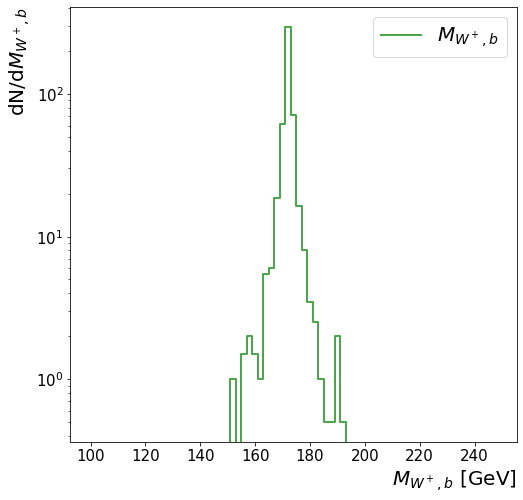

In [90]:
plt.figure(figsize=(8,8)) # plotsize

print("total events: {} ".format(len(pm)))

bin_size = np.linspace(100,250,76)
hist, bins = np.histogram(pm, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/2,color = "green", where='mid',linewidth=2, alpha=0.7,label="$M_{W^+,b}$") 

plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20) # plot label tag
plt.yscale('log') 
plt.xlabel("$M_{W^+,b}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$M_{W^+,b}$", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

total events: 1000 


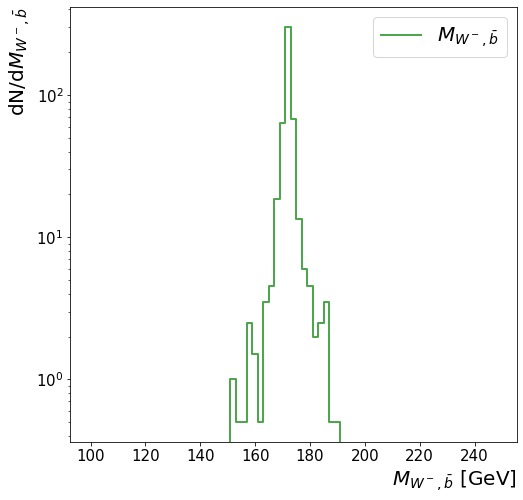

In [91]:
plt.figure(figsize=(8,8)) # plotsize

print("total events: {} ".format(len(nm)))

bin_size = np.linspace(100,250,76)
hist, bins = np.histogram(nm, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/2,color = "green", where='mid',linewidth=2, alpha=0.7,label="$M_{W^-,\\bar{b}}$") 

plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20) # plot label tag
plt.yscale('log') 
plt.xlabel("$M_{W^-,\\bar{b}}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$M_{W^-,\\bar{b}}$", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

In [ ]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(0,200,201)
hist, bins = np.histogram(m, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/10,color = "green", where='mid',linewidth=2, alpha=0.7,label="$M_{xd,\\bar{xd}}$") 

plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20) # plot label tag
plt.yscale('log') 
plt.xlabel("$M_{xd,\\bar{xd}}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$M_{xd,\\bar{xd}}$", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()

In [ ]:
plt.figure(figsize=(8,8)) # plotsize

bin_size = np.linspace(0,2000,201)
hist, bins = np.histogram(mT, bins=bin_size)
plt.step(bins[:-1], hist.astype(np.float32)/10,color = "green", where='mid',linewidth=2, alpha=0.7,label="$M_{xd,\\bar{xd}}$") 

plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20) # plot label tag
plt.yscale('log') 
plt.xlabel("$M_{xd,\\bar{xd}}$ [GeV]" , fontsize=20, horizontalalignment='right',x=1)  # plot x-axis label
plt.ylabel("dN/d$MT_{xd,\\bar{xd}}$", fontsize=20, horizontalalignment='right',y=1)  # plot y-axis label
plt.xticks(fontsize=15)   # set x-ticks size
plt.yticks(fontsize=15)   # set y-ticks size 
# plt.savefig("./invariant_mass_SVJ.png")  #save figure as png
plt.show()